# **Analyzing Products Data from Amazon Product Search**

The core objective of this project is to identify potential products suitable for sale on Amazon. This is achieved through an analysis of product data acquired from Amazon Product Search via the RapidAPI service. By utilizing data analysis techniques, the project aims to uncover insights that assist in recognizing optimal products for selling. Metrics including ratings, prices, total reviews, best seller status, and more will be scrutinized to reveal patterns that inform strategic choices and refine product positioning.

The project also involves comparing revenue, demand, and ratings against other products. Moreover, it employs a Random Forest model to predict the potential success of a product in the market.

 Through this holistic analysis, the project seeks to offer actionable insights that steer effective business strategies and aid in the selection of the most advantageous products for the market.


<a id='top'></a>
### Table of Contents
1. [Query Analysis Tools](##query-analysis-tools)
 - [API Query and Data Retrieval](###api-query-and-data-retrieval)
 - [Key Data Extraction](###key-data-extraction)
 - [Query Data Visualization](###query-data-visualization)
2. [Amazon Profitability Predictor](##amazon-profitability-predictor)
 - [Data Retrieval and DataFrame Construction](###data-retrieval-and-dataframe-construction)
 - [Data Visualization and Trimming](###data-trimming-and-visualization)
 - [Query Analyzer](###query-analyzer)
 - [Random Forest Model](###random-forest-model)

## <a id="query-analysis-tools">Query Analysis Tools</a>

This Section contains helpful resources tailored for Amazon sellers, designed to deliver valuable insights into the products you're eager to learn more about.


### <a id="api-query-and-data-retrieval">API Query and Data Retrieval</a>

In [ ]:
# import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from decimal import DivisionByZero

I'm utilizing the https://rapidapi.com/restyler/api/amazon23/ API provided by RapidAPI to fetch search data from Amazon. This API allows performing searches for products and retrieving relevant information. You can easily change the query in the querystring variable by changing the "query" parameter. The 'X-RapidAPI-Key' parameter should be changed to personal Api key.

In [ ]:
# URL of the API endpoint
url = "https://amazon23.p.rapidapi.com/product-search"

# Query parameters for the API request
querystring = {"query": "soap", "country": "US"}

# Headers containing API key and host information
headers = {
    "X-RapidAPI-Key": "X-RapidAPI-Key",
    "X-RapidAPI-Host": "amazon23.p.rapidapi.com"
}

# Make a GET request to the API endpoint with the specified headers and parameters
response = requests.get(url, headers=headers, params=querystring)

# Parse the JSON response from the API
data = response.json()
print(data)

{'totalProducts': '9348', 'category': 'aps', 'result': [{'position': {'page': 1, 'position': 1, 'global_position': 1}, 'asin': 'B08GGR5HLS', 'price': {'discounted': False, 'current_price': 0, 'currency': 'USD', 'before_price': 0, 'savings_amount': 0, 'savings_percent': 0}, 'reviews': {'total_reviews': 117, 'rating': 4.4}, 'url': 'https://www.amazon.com/dp/B08GGR5HLS', 'score': '514.80', 'sponsored': False, 'amazonChoice': False, 'bestSeller': False, 'amazonPrime': False, 'title': 'Sponsored Ad - 365 by Whole Foods Market, Outstanding Orange Kids Foaming Hand Soap, 12 Fl Oz', 'thumbnail': 'https://m.media-amazon.com/images/I/41VSARgOGlL._AC_UL320_.jpg'}, {'position': {'page': 1, 'position': 2, 'global_position': 2}, 'asin': 'B0BDMZS8SX', 'price': {'discounted': False, 'current_price': 46.45, 'currency': 'USD', 'before_price': 0, 'savings_amount': 0, 'savings_percent': 0}, 'reviews': {'total_reviews': 142082, 'rating': 4.4}, 'url': 'https://www.amazon.com/dp/B0BDMZS8SX', 'score': '625160

### <a id="key-data-extraction">Key Data Extraction</a>

Code below processes data from the API response to extract various statistics about products, such as ratings, reviews, and prices. It calculates the mean values of ratings, reviews, and prices for the selected products and identifies best sellers and top-ranking items. It will be used to create tables with information about query.

In [ ]:
# Initialize variables to store various statistics
ratings_sum = 0
highest_rating = 0
highest_rating_url = ''
total_products = 0
reviews_sum = 0
price_sum = 0
products_with_price = 0
lowest_price = 999999999999
highest_price = -1
highest_price_prod_url = ''
lowest_price_prod_url = ''
best_seller_count = 0
best_sellers_urls = []
top_positions = []

# Iterate through each product in the API response data
for product in data['result']:
    # Check if the product's page position is within the first 5 pages
    if product['position']['page'] <= 5:
        # Calculate cumulative statistics
        ratings_sum += product['reviews']['rating']
        if product['reviews']['rating'] > highest_rating:
             highest_rating = product['reviews']['rating']
             highest_rating_url = product['url']
        total_products += 1
        reviews_sum += product['reviews']['total_reviews']

        # Check if the product has a non-zero price
        if product['price']['current_price'] != 0:
            price_sum += product['price']['current_price']
            products_with_price += 1

        # Update highest and lowest price products
        if product['price']['current_price'] > highest_price:
            highest_price = product['price']['current_price']
            highest_price_prod_url = product['url']
        if product['price']['current_price'] < lowest_price:
            lowest_price = product['price']['current_price']
            lowest_price_prod_url = product['url']

        # Check if the product is a best seller
        if product['bestSeller'] != False:
            best_seller_count += 1
            best_sellers_urls.append(product['url'])

        # Check if the product's global position is within the top 3
        if product['position']['global_position'] <= 3:
            top_positions.append(product['url'])

# Calculate mean values for ratings, reviews, and price
if total_products > 0:
    mean_rating = ratings_sum / total_products
else:
    mean_rating = None

if total_products > 0:
    mean_reviews = reviews_sum / total_products
else:
    mean_reviews = None

if products_with_price > 0:
    mean_price = price_sum / products_with_price
else:
    mean_price = None

In this section, we'll create a summary table that provides key insights about the products retrieved from the Amazon Product Search API. This table includes information such as the total number of products, category, mean price, mean rating, mean total reviews, and the count of best sellers.

In [ ]:
info_table = {
    'Total products': [data['totalProducts']],
    'Category': [data['category']],
    'Mean price': [mean_price],
    'Mean rating': [mean_rating],
    'Mean total reviews': [int(mean_reviews)],
    'Best seller count': [best_seller_count]
}

info_df = pd.DataFrame(info_table)
display(info_df)

,Total products,Category,Mean price,Mean rating,Mean total reviews,Best seller count
0,9348,aps,23.009649,4.542373,13095,1


In this section, we will construct a DataFrame that compiles information about the product with the lowest price, the product with the highest price, product with the highest rating, best-selling products, and top-ranking products. This DataFrame serves as a valuable resource to discern essential attributes of products that exhibit strong positioning and successful sales performance.

In [ ]:
unique_table = {
    'Lowest_price_prduct': [lowest_price_prod_url],
    'highest_price_product': [highest_price_prod_url],
    'highest_rating_url': [highest_rating_url]
}

unique_df = pd.DataFrame(unique_table)

j = 0
for prod_url in best_sellers_urls:
 unique_df[f'best seller {j}'] = prod_url
 j +=1

k = 1
for prod_url in top_positions:
  unique_df[f'{k} position product'] = prod_url
  k += 1

display(unique_df)

,Lowest_price_prduct,highest_price_product,highest_rating_url,best seller 0,1 position product,2 position product,3 position product
0,https://www.amazon.com/dp/B08GGR5HLS,https://www.amazon.com/dp/B0BDMZS8SX,https://www.amazon.com/dp/B07FY17L3N,https://www.amazon.com/dp/B09MFMCTRK,https://www.amazon.com/dp/B08GGR5HLS,https://www.amazon.com/dp/B0BDMZS8SX,https://www.amazon.com/dp/B01LWIAJ3S


### <a id="query-data-visualization">Query Data Visualization</a>



This code processes data from the API response to extract and categorize key attributes of products in order to visualize the data later on.

In [ ]:
# Lists to store various attributes
total_reviews = []
ratings = []
prices = []
best_sellers = []
amzn_primes = []
amzn_choices = []
glob_positions = []
sponsored = []

# Loop through each product in the API response
for product in data['result']:
    # Check if the product's page position is within the first 5 pages
    if product['position']['page'] <= 5:
        # Append attributes to respective lists
        ratings.append(product['reviews']['rating'])  # Ratings
        total_reviews.append(product['reviews']['total_reviews'])  # Total reviews

        # Check if the product's current price is not 0
        if product['price']['current_price'] != 0:
            prices.append(product['price']['current_price'])  # Prices

        # Handle the case where the current price is 0
        if product['price']['current_price'] == 0:
            try:
                prices.append(sum(prices)/len(prices))  # Calculate average price
            except ZeroDivisionError:
                prices.append(1)  # Handle division by zero

        # Check if the product is marked as Amazon Prime
        if product['amazonPrime'] == True:
            amzn_primes.append(1)  # Amazon Prime
        if product['amazonPrime'] == False:
            amzn_primes.append(0)  # Not Amazon Prime

        # Check if the product is marked as Amazon Choice
        if product['amazonChoice'] == True:
            amzn_choices.append(1)  # Amazon Choice
        if product['amazonChoice'] == False:
            amzn_choices.append(0)  # Not Amazon Choice

        # Check if the product is a best seller
        if product['bestSeller'] == True:
            best_sellers.append(1)  # Best seller
        if product['bestSeller'] == False:
            best_sellers.append(0)  # Not a best seller

        # Store global position of the product
        glob_positions.append(product['position']['global_position'])  # Global position

        # Check if the product is sponsored
        if product['sponsored'] == True:
            sponsored.append(1)  # Sponsored
        if product['sponsored'] == False:
            sponsored.append(0)  # Not sponsored



This code generates a histogram to analyze the distribution of total reviews across products. The histogram visualization of total reviews provides a clear view of how reviews are distributed across products. Peaks in the histogram indicate popular products with a specific range of review counts, while the shape and tail behavior help identify the concentration of reviews and the presence of exceptional cases.

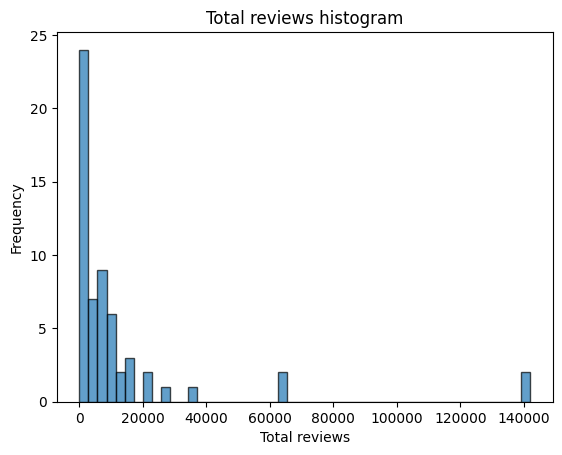

In [ ]:
# create total_reviews histogram
plt.hist(total_reviews, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Total reviews')
plt.ylabel('Frequency')
plt.title('Total reviews histogram')
plt.show()

The histogram below visualizes the distribution of ratings across products. Peaks and patterns in the histogram offer insights into the most common rating ranges, revealing product popularity levels and potential customer preferences. The visualization can also highlight any extreme or outlier ratings that could impact purchasing decisions.

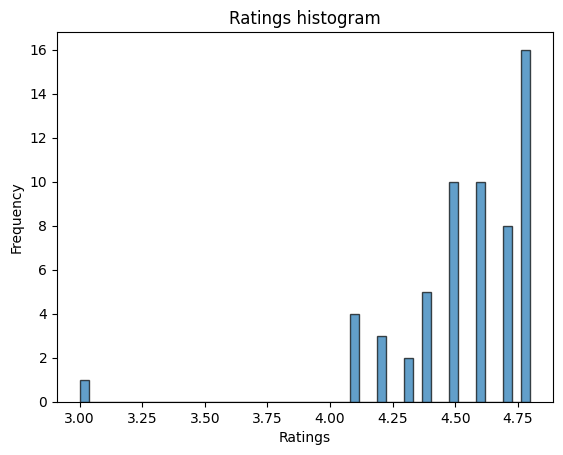

In [ ]:
# create ratings histogram
plt.hist(ratings, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Ratings histogram')
plt.show()

This histogram illustrates the distribution of prices among products. Peaks and clusters in the histogram unveil common price ranges, aiding in identifying price points that attract customers. Additionally, the visualization can highlight products at the extremes, indicating premium or budget offerings that may influence consumer choices.

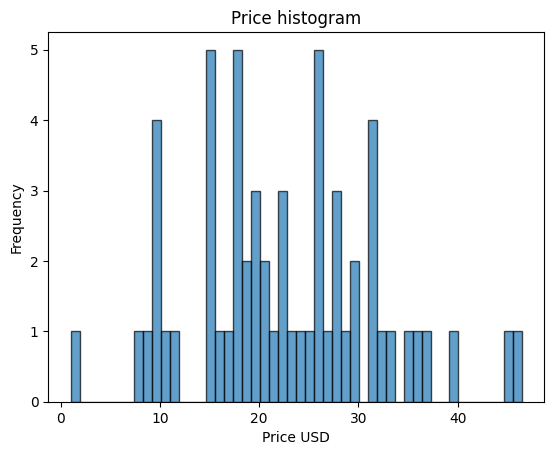

In [ ]:
# create prices histogram
plt.hist(prices, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price USD')
plt.ylabel('Frequency')
plt.title('Price histogram')
plt.show()

The heatmap showcases the Pearson correlation coefficients between various attributes of products. Colors and values in the heatmap indicate the strength and direction of relationships. By observing patterns, analysts can discern connections such as how ratings, prices, total reviews, best seller status, and other attributes interrelate, aiding in identifying factors that influence product performance.

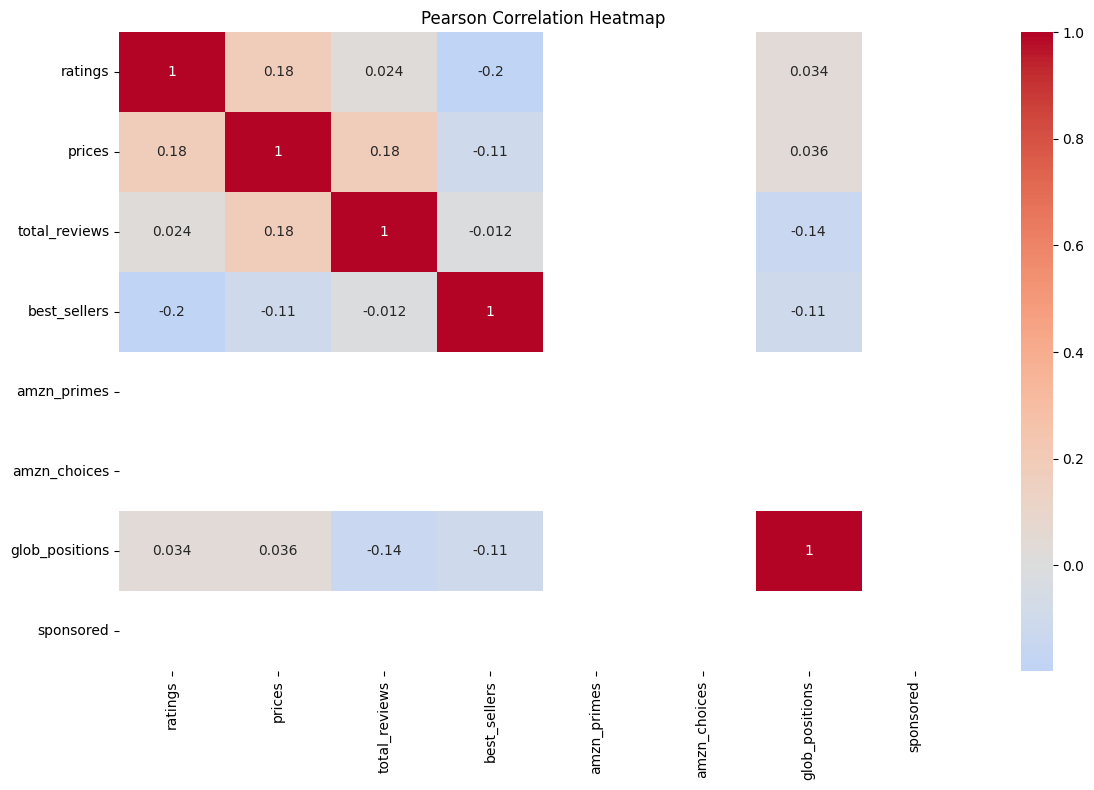

In [ ]:
# create pearson correlation heatmap
Vals = {'ratings': ratings,
        'prices': prices,
        'total_reviews': total_reviews,
        'best_sellers': best_sellers,
        'amzn_primes': amzn_primes,
        'amzn_choices': amzn_choices,
        'glob_positions': glob_positions,
        'sponsored': sponsored
}

df = pd.DataFrame(Vals)

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

## <a id="amazon-profitability-predictor">Estaimate Sales Predictor</a>

I implemented a Query Analyzer function to assess products against medians for indicators like revenue and demand ratio. These explanations aim to provide insights within a Jupyter Notebook environment. Additionally, I developed two Random Forest models to predict whether the product will be succeseful to sell.

### <a id="data-retrieval-and-dataframe-construction">Data Retrieval and DataFrame Construction</a>

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Below I created list with popular amazon queries. It will be used to create DataFrame.

In [ ]:
products = [
    "Wireless%Headpones",
    "Smart%Home%Device",
    "Camera",
    "Health%and%Fitness%Tracker",
    "Portable%Bluetooth%Speaker",
    "Personal%Care%Appliance",
    "Kitchen%Essential",
    "Wireless%Charging%Solution",
    "LED%Desk%Light",
    "Outdoor%Adventure%Gear",
    "Fitness%Training%Kit",
    "Home%and%Kitchen%Tool",
    "Automated%Cleaning%Device",
    "On-the-Go%Drinkware",
    "Sleep%and%Relaxation%Device",
    "Kitchen%Appliance",
    "Outdoor%Illumination",
    "Exercise%Mat",
    "Noise-Isolating%Headphones",
    "Home%Security%Solution",
    "Car%Phone%Mount",
    "ElectricTransport",
    "Portable%Powerbank",
    "Plant%Container",
    "Foldable%Fitness%Equipment",
    "Portable%Media%Display",
    "Smart%Thermostat",
    "Kitchen%Appliance",
    "Temperature%Monitor",
    "Smart%Door%Access",
    "Outdoor%Relaxation",
    "Home%Light",
    "Virtual%Reality",
    "Culinary%Tool%Set",
    "Ergonomic%Office%Seat",
    "Hair%Styling",
    "Gaming%Controller",
    "Kitchen%Prep%Essential",
    "Space-Saving%Containers",
    "Fidget%Tool",
    "Digital%Creative%Tool",
    "UV-C%Sanitizing%Device",
    "Eco-Friendly%Storage",
    "Wireless%Car%Audio%Adapter",
    "Travel%Comfort%Accessory",
    "Portable%Screen%Solution",
    "Gel%Nail%Kit",
    "Fitness%Core%Strengthening%Tool",
    "Wireless%Microphone",
    "Foldable%Transportation",
    "Yoga%Support",
    "Coffee%Maker",
    "Adjustable%Work%Stand",
    "Sustainable%Kitchen",
    "Fitness%Resistance%Gear",
    "Air%Purification%Device",
    "Smart%Garden",
    "Gaming%Accessories%Stand",
    "Indoor%Cycling",
    "Automated%Pet%Feeder",
    "Travel%Organizer%Set",
    "Mini%Kitchen%Appliance",
    "Video%Communication%Tool",
    "Smart%Hydration%Solution",
    "Fitness%Core%Training%Tool",
    "Adjustable%Weight%Set",
    "Compact%Cookware%Set",
    "Decorative%Illumination",
    "Digital%Voice%Recording%Device",
    "Smart%Tracking%Device",
    "Outdoor%Cooking%Gear",
    "Portable%Recreational%Device",
    "Bluetooth%Car%Upgrade",
    "Ergonomic%Gaming%Seating",
    "Smart%Security%Accessory",
    "Reusable%Coffee%Tool",
    "Adjustable%Fitness%Gear",
    "Stainless%Steel%Food%Container",
    "Electric%Beverage%Opener",
    "Wireless%Audio%Hat",
    "Portable%Personal%Cooling",
    "Space-Saving%Yoga%Mat",
    "Automated%Lawn%Care",
    "Digital%Baggage%Weight%Monitor",
    "Portable%Audio%Playback",
    "Indoor%Gardening%Kit",
    "Portable%Hand%Heater",
    "Home%Network%Extender",
    "Travel%Container",
    "Smart%Bike%Safety%Gear",
    "Fitness%Tracking%Device",
    "Adjustable%Work%Surface",
    "Phone%Sanitization",
    "Portable%Monitor%Stand",
    "Wireless%Charging",
    "Resistance%Training",
    "Portable%Heating",
    "Digital%Notebook",
    "Wine%Access%Tool",
    "Food%Cover",
    "Outdoor%Illumination",
    "Indoor%Cycling%Support",
    "Cleaning%Tool",
    "Light%Control",
    "Outdoor%Seating",
    "Portable%Hygiene",
    "Dumbbell%Set",
    "Outdoor%Recreation%Accessory",
    "Bluetooth%Gaming%Accessory",
    "Stainless%Steel%Cooking%Set",
    "Collapsible%Outdoor%Furniture",
    "Indoor%Monitoring",
    "Fitness%Play%Tool",
    "Portable%Water%Transport",
    "Gaming%Surface",
    "Foldable%Outdoor%Seat"
]


print(len(products))

116


Data frame initialization with blank values.

In [ ]:
query_df = pd.DataFrame({
    'total products': [],
    'mean price': [],
    'mean reviews': [],
    'mean rating': [],
    'best sellers count': [],
    'amazon prime count':[],
    'amazon choice count': [],
    'revenue indicator': [],
    'demand ratio': []
})

This code gathers information from Amazon product listings via the Hexxondiv Amazon Data Scraper API. It collects data such as prices, ratings, and reviews for specified products, computes averages and counts for these attributes, and stores outcomes in a DataFrame. Two extra columns have been added for use in constructing a prediction model and product analysis against other products. The API was switched due to exhausting free calls from the prior API, resulting in a DataFrame of 81 rows, providing satisfactory insights despite incomplete list coverage. The 'X-RapidAPI-Key' parameter should be changed to personal API key.

In [ ]:
# Loop through each product in the 'products' list
for prod in products:
  print(prod)

  # Construct the URL for the API request using the product name
  url = "https://hexxondiv-amazon-data-scraper.p.rapidapi.com/search/" + prod

  # Set the query parameters for the API request
  querystring = {"api_key":"260bb6aace1bbf4df4a7cd832a4661a1"}

  # Set the headers for the API request
  headers = {
    "X-RapidAPI-Key": "X-RapidAPI-Key",
    "X-RapidAPI-Host": "hexxondiv-amazon-data-scraper.p.rapidapi.com"
  }

  # Make a GET request to the API
  response = requests.get(url, headers=headers, params=querystring)

  # Parse the response JSON data
  data = response.json()

  # Initialize variables to store various statistics
  total_products = len(data['results'])
  prices = []
  ratings = []
  reviews = []
  best_sellers = 0
  amzn_primes = 0
  amzn_choices = 0

  # Iterate over the first 10 results from the API response
  for x in range(10):
    try:
      # Check if the product has a price and is denominated in dollars
      if data['results'][x]['price_symbol'] == '$' and data['results'][x]['price'] is not None:
        prices.append(int(data['results'][x]['price']))

      # Check if the product has a star rating
      if data['results'][x]['stars'] is not None:
        ratings.append(data['results'][x]['stars'])

      # Check if the product has a total review count
      if data['results'][x]['total_reviews'] is not None:
        reviews.append(data['results'][x]['total_reviews'])

      # Check if the product is marked as a best seller
      if data['results'][x]['is_best_seller'] is not None:
        if data['results'][x]['is_best_seller'] == True:
          best_sellers += 1

      # Check if the product is marked as an Amazon Choice
      if data['results'][x]['is_amazon_choice'] is not None:
        if data['results'][x]['is_amazon_choice'] == True:
          amzn_choices  += 1

      # Check if the product is marked as having Amazon Prime availability
      if data['results'][x]['has_prime'] is not None:
        if data['results'][x]['has_prime'] == True:
          amzn_primes += 1
    except IndexError:
      break

  try:
    # Calculate the mean price, mean rating, and mean reviews
    mean_price = sum(prices)/len(prices)
    mean_rating = sum(ratings)/len(ratings)
    mean_reviews = sum(reviews)/len(reviews)
  except ZeroDivisionError:
    continue

  # Create a list with various statistics for the current product
  query_info = [total_products, mean_price, mean_reviews, mean_rating, best_sellers, amzn_primes, amzn_choices, mean_price*mean_reviews, mean_reviews/total_products]

  # Add the product's statistics to the query_df DataFrame
  query_df.loc[prod] = query_info


Wireless%Headpones
Smart%Home%Device
Camera
Health%and%Fitness%Tracker
Portable%Bluetooth%Speaker
Personal%Care%Appliance
Kitchen%Essential
Wireless%Charging%Solution
LED%Desk%Light
Outdoor%Adventure%Gear
Fitness%Training%Kit
Home%and%Kitchen%Tool
Automated%Cleaning%Device
On-the-Go%Drinkware
Sleep%and%Relaxation%Device
Kitchen%Appliance
Outdoor%Illumination
Exercise%Mat
Noise-Isolating%Headphones
Home%Security%Solution
Car%Phone%Mount
ElectricTransport
Portable%Powerbank
Plant%Container
Foldable%Fitness%Equipment
Portable%Media%Display
Smart%Thermostat
Kitchen%Appliance
Temperature%Monitor
Smart%Door%Access
Outdoor%Relaxation
Home%Light
Virtual%Reality
Culinary%Tool%Set
Ergonomic%Office%Seat
Hair%Styling
Gaming%Controller
Kitchen%Prep%Essential
Space-Saving%Containers
Fidget%Tool
Digital%Creative%Tool
UV-C%Sanitizing%Device
Eco-Friendly%Storage
Wireless%Car%Audio%Adapter
Travel%Comfort%Accessory
Portable%Screen%Solution
Gel%Nail%Kit
Fitness%Core%Strengthening%Tool
Wireless%Microphone


KeyError: ignored

The fisrt column i created is called 'revenue indicator'. It is a product of mean price and mean number of reviews. It informs how much money the products from the query generate assuming that mean number of reviews is strongly corelated to product sales.

Secound new column is 'demand ratio'. It is a ratio between mean number of reviews and total products. It shows how high is the demand for the product also assuming that mean number of reviews ~ product sales.

In [ ]:
display(query_df)

,total products,mean price,mean reviews,mean rating,best sellers count,amazon prime count,amazon choice count,revenue indicator,demand ratio
Wireless%Headpones,18.0,44.200000,8006.000000,4.610000,1.0,8.0,1.0,3.538652e+05,444.777778
Smart%Home%Device,48.0,62.300000,60.285714,4.442857,0.0,6.0,1.0,3.755800e+03,1.255952
Camera,56.0,68.666667,171.900000,4.510000,1.0,10.0,1.0,1.180380e+04,3.069643
Health%and%Fitness%Tracker,34.0,83.100000,5976.900000,4.240000,1.0,9.0,2.0,4.966804e+05,175.791176
Portable%Bluetooth%Speaker,18.0,60.777778,43633.700000,4.660000,1.0,9.0,0.0,2.651959e+06,2424.094444
...,...,...,...,...,...,...,...,...,...
Phone%Sanitization,16.0,36.200000,2334.300000,4.360000,0.0,8.0,0.0,8.450166e+04,145.893750
Portable%Monitor%Stand,26.0,21.900000,96.500000,4.530000,0.0,10.0,3.0,2.113350e+03,3.711538
Wireless%Charging,18.0,17.900000,45030.800000,4.350000,1.0,9.0,0.0,8.060513e+05,2501.711111
Resistance%Training,48.0,29.100000,438.700000,4.530000,0.0,10.0,1.0,1.276617e+04,9.139583


In [ ]:
query_df.to_csv('amazon_queries.csv', index=False)

### <a id="data-visualization-and-trimming">Data Visualization and Trimming</a>

Below there are scatter plots for revenue indicator, demand ratio and ratings.

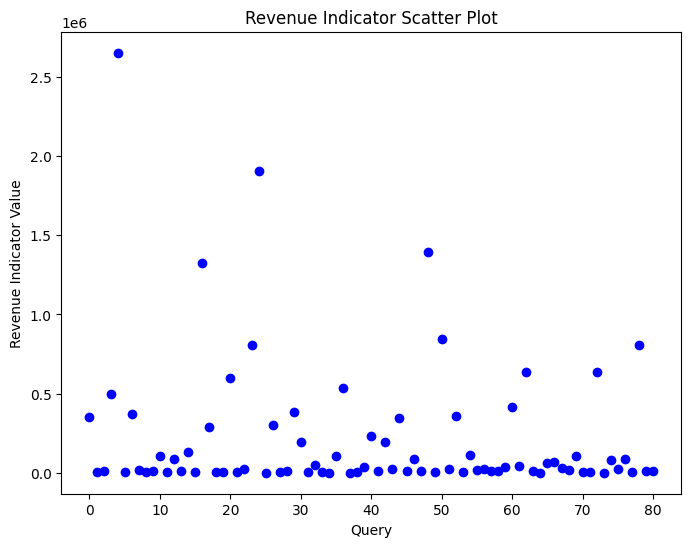

In [ ]:
x = [x for x in range(81)]
y = query_df['revenue indicator'].values.tolist()

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Query')
plt.ylabel('Revenue Indicator Value')
plt.title('Revenue Indicator Scatter Plot')
plt.show()

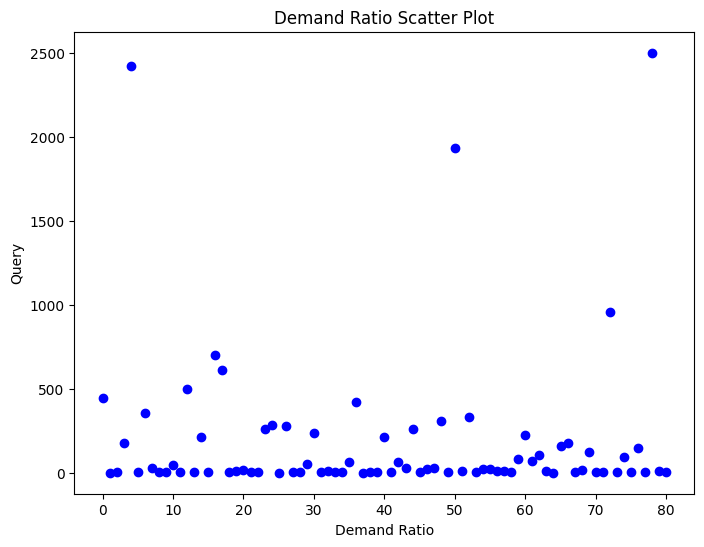

In [ ]:
x = [x for x in range(81)]
y = query_df['demand ratio'].values.tolist()

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Demand Ratio')
plt.ylabel('Query')
plt.title('Demand Ratio Scatter Plot')
plt.show()

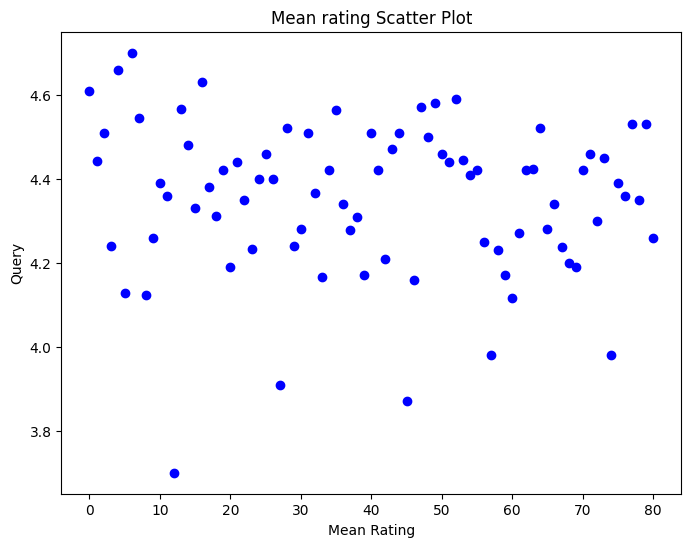

In [ ]:
x = [x for x in range(81)]
y = query_df['mean rating'].values.tolist()

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Mean Rating')
plt.ylabel('Query')
plt.title('Mean rating Scatter Plot')
plt.show()


Due to widely scattered values in the demand ratio and revenue indicator, I have created a new DataFrame in which I deleted rows with extreme values for both columns, so the DataFrame will be a bit less scattered.

In [ ]:
amazon_df = query_df

In [ ]:
revenue_indicator_median = amazon_df['revenue indicator'].median()
demand_ratio_median = amazon_df["demand ratio"].median()

amazon_df = amazon_df[amazon_df['revenue indicator'] <= 25 * revenue_indicator_median]
amazon_df = amazon_df[amazon_df['revenue indicator'] >= revenue_indicator_median / 25]

amazon_df = amazon_df[amazon_df['demand ratio'] >= demand_ratio_median / 25]
amazon_df = amazon_df[amazon_df['demand ratio'] <= demand_ratio_median * 25]

display(amazon_df)


,total products,mean price,mean reviews,mean rating,best sellers count,amazon prime count,amazon choice count,revenue indicator,demand ratio,label
Smart%Home%Device,48.0,62.300000,60.285714,4.442857,0.0,6.0,1.0,3755.800000,1.255952,0
Camera,56.0,68.666667,171.900000,4.510000,1.0,10.0,1.0,11803.800000,3.069643,0
Health%and%Fitness%Tracker,34.0,83.100000,5976.900000,4.240000,1.0,9.0,2.0,496680.390000,175.791176,0
Personal%Care%Appliance,60.0,38.900000,179.714286,4.128571,0.0,9.0,0.0,6990.885714,2.995238,0
Kitchen%Essential,48.0,21.700000,17004.200000,4.700000,2.0,10.0,0.0,368991.140000,354.254167,1
...,...,...,...,...,...,...,...,...,...,...
Adjustable%Work%Surface,50.0,122.700000,190.100000,4.390000,0.0,9.0,1.0,23325.270000,3.802000,0
Phone%Sanitization,16.0,36.200000,2334.300000,4.360000,0.0,8.0,0.0,84501.660000,145.893750,0
Portable%Monitor%Stand,26.0,21.900000,96.500000,4.530000,0.0,10.0,3.0,2113.350000,3.711538,0
Resistance%Training,48.0,29.100000,438.700000,4.530000,0.0,10.0,1.0,12766.170000,9.139583,0


Now we have 2 DataFrames which will be used to make 2 separate predicting models. Below there is visualization of the trimmed data.

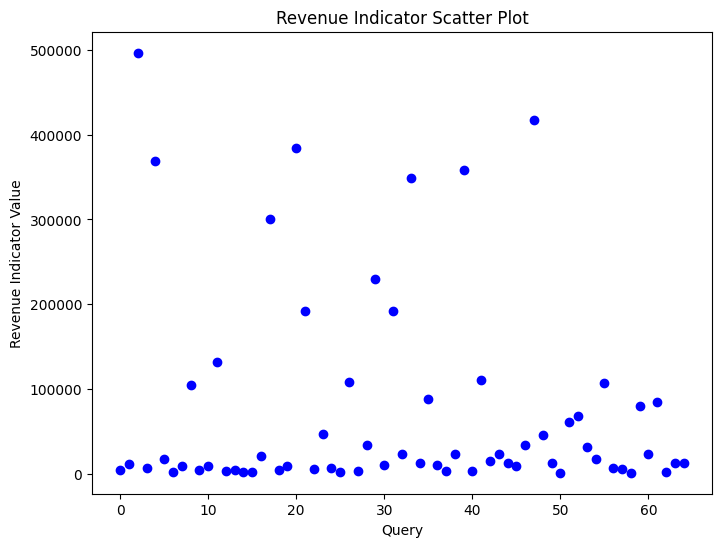

In [ ]:
y = amazon_df['revenue indicator'].values.tolist()
x = [x for x in range(len(y))]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Query')
plt.ylabel('Revenue Indicator Value')
plt.title('Revenue Indicator Scatter Plot')
plt.show()

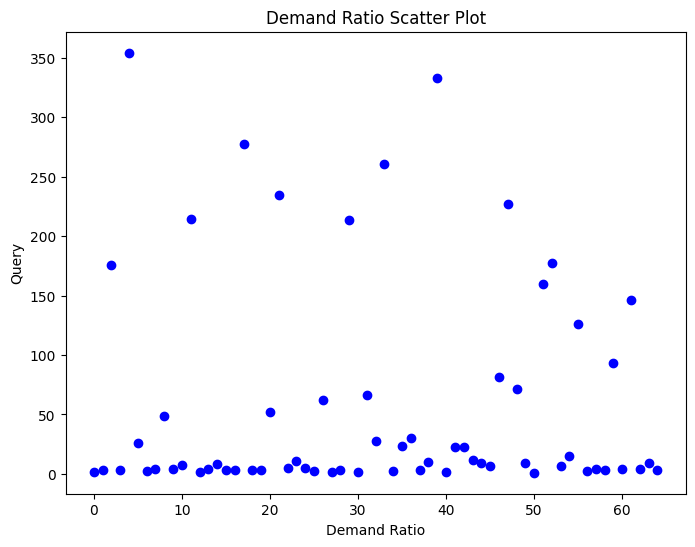

In [ ]:
y = amazon_df['demand ratio'].values.tolist()
x = [x for x in range(len(y))]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Demand Ratio')
plt.ylabel('Query')
plt.title('Demand Ratio Scatter Plot')
plt.show()

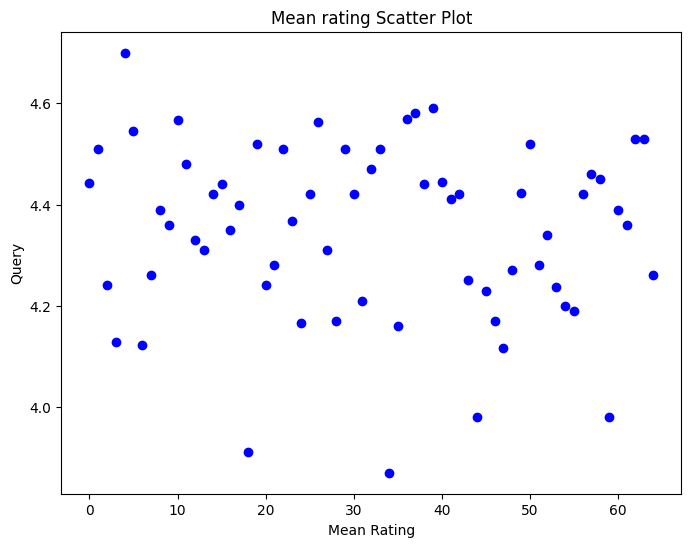

In [ ]:
y = amazon_df['mean rating'].values.tolist()
x = [x for x in range(len(y))]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Mean Rating')
plt.ylabel('Query')
plt.title('Mean rating Scatter Plot')
plt.show()

### <a id="query-analyzer">Query Analyzer</a>

This function can be used to obtain insights on how the revenue indicator, demand ratio, and mean rating of a query compare to their respective medians.

In [ ]:
def QueryAnalyzer(query, revenue_indicator_median, demand_ratio_median, rating_median):
  # Construct the URL for the API request using the provided query
  url = "https://hexxondiv-amazon-data-scraper.p.rapidapi.com/search/" + query

  # Set the query parameters for the API request
  querystring = {"api_key":"260bb6aace1bbf4df4a7cd832a4661a1"}

  # Set the headers for the API request
  headers = {
    "X-RapidAPI-Key": "77e19541e2msh0b74d6e3120b38ep1eb0ddjsn8ca2b7c09c00",
    "X-RapidAPI-Host": "hexxondiv-amazon-data-scraper.p.rapidapi.com"
  }

  # Make a GET request to the API
  response = requests.get(url, headers=headers, params=querystring)
  data = response.json()

  # Initialize variables to store various statistics
  total_products = len(data['results'])
  prices = []
  ratings = []
  reviews = []
  best_sellers = 0
  amzn_primes = 0
  amzn_choices = 0

  # Iterate over the first 10 results from the API response
  for x in range(10):
    try:
      # Check if the product has a price denoted in dollars and is not None, then add it to 'prices'
      if data['results'][x]['price_symbol'] == '$' and data['results'][x]['price'] is not None:
        prices.append(int(data['results'][x]['price']))

      # Check if the product has a star rating, then add it to 'ratings'
      if data['results'][x]['stars'] is not None:
        ratings.append(data['results'][x]['stars'])

      # Check if the product has a total review count, then add it to 'reviews'
      if data['results'][x]['total_reviews'] is not None:
        reviews.append(data['results'][x]['total_reviews'])

      # Count the number of best sellers
      if data['results'][x]['is_best_seller'] is not None:
        if data['results'][x]['is_best_seller'] == True:
          best_sellers += 1

      # Count the number of Amazon Choice products
      if data['results'][x]['is_amazon_choice'] is not None:
        if data['results'][x]['is_amazon_choice'] == True:
          amzn_choices  += 1

      # Count the number of products with Amazon Prime availability
      if data['results'][x]['has_prime'] is not None:
        if data['results'][x]['has_prime'] == True:
          amzn_primes += 1
    except IndexError:
      break

  try:
    # Calculate mean values for price, rating, and reviews
    mean_price = sum(prices)/len(prices)
    mean_rating = sum(ratings)/len(ratings)
    mean_reviews = sum(reviews)/len(reviews)

    # Generate result string based on calculated values and provided medians
    result = f'Query {query} has better mean ratings than {mean_rating/rating_median}% queries, has higher mean revenue indicator than {mean_price*mean_reviews/revenue_indicator_median}% queries and has higher mean demand ratio than {(mean_reviews/total_products)/demand_ratio_median}% queries'
  except ZeroDivisionError:
    # Handle ZeroDivisionError when there's not enough data
    result = f'Not enough data for query {query}'

  return result


### <a id="random-forest-model">Random Forest Model</a>

I added column with label 0 or 1 for every query in DataFrames (The initial 1 and the 1 after trimming). 1 means that the products in query are predicted to sell well and 0 means that they will not be good products to sell.

In [ ]:
revenue_indicator_median = amazon_df['revenue indicator'].median()
demand_ratio_median = amazon_df["demand ratio"].median()
rating_median = amazon_df['mean rating'].median()

amazon_df['label'] = 0

for idx, query in amazon_df.iterrows():
  if query['demand ratio'] > 1.2 * demand_ratio_median and query['revenue indicator'] > 1.2 * revenue_indicator_median and query['mean rating'] > 1 * rating_median:
    amazon_df.loc[idx, 'label'] = 1

display(amazon_df)

,total products,mean price,mean reviews,mean rating,best sellers count,amazon prime count,amazon choice count,revenue indicator,demand ratio,label
Smart%Home%Device,48.0,62.300000,60.285714,4.442857,0.0,6.0,1.0,3755.800000,1.255952,0
Camera,56.0,68.666667,171.900000,4.510000,1.0,10.0,1.0,11803.800000,3.069643,0
Health%and%Fitness%Tracker,34.0,83.100000,5976.900000,4.240000,1.0,9.0,2.0,496680.390000,175.791176,0
Personal%Care%Appliance,60.0,38.900000,179.714286,4.128571,0.0,9.0,0.0,6990.885714,2.995238,0
Kitchen%Essential,48.0,21.700000,17004.200000,4.700000,2.0,10.0,0.0,368991.140000,354.254167,1
...,...,...,...,...,...,...,...,...,...,...
Adjustable%Work%Surface,50.0,122.700000,190.100000,4.390000,0.0,9.0,1.0,23325.270000,3.802000,0
Phone%Sanitization,16.0,36.200000,2334.300000,4.360000,0.0,8.0,0.0,84501.660000,145.893750,0
Portable%Monitor%Stand,26.0,21.900000,96.500000,4.530000,0.0,10.0,3.0,2113.350000,3.711538,0
Resistance%Training,48.0,29.100000,438.700000,4.530000,0.0,10.0,1.0,12766.170000,9.139583,0


In [ ]:
amazon_df_v2 = query_df
revenue_indicator_median = amazon_df_v2['revenue indicator'].median()
demand_ratio_median = amazon_df_v2["demand ratio"].median()
rating_median = amazon_df_v2['mean rating'].median()


amazon_df_v2['label'] = 0

for idx, query in amazon_df_v2.iterrows():
  if query['demand ratio'] > 1.2 * demand_ratio_median and query['revenue indicator'] > 1.2 * revenue_indicator_median and query['mean rating'] > 1 * rating_median:
    amazon_df_v2.loc[idx, 'label'] = 1

display(amazon_df_v2)

,total products,mean price,mean reviews,mean rating,best sellers count,amazon prime count,amazon choice count,revenue indicator,demand ratio,label
Wireless%Headpones,18.0,44.200000,8006.000000,4.610000,1.0,8.0,1.0,3.538652e+05,444.777778,1
Smart%Home%Device,48.0,62.300000,60.285714,4.442857,0.0,6.0,1.0,3.755800e+03,1.255952,0
Camera,56.0,68.666667,171.900000,4.510000,1.0,10.0,1.0,1.180380e+04,3.069643,0
Health%and%Fitness%Tracker,34.0,83.100000,5976.900000,4.240000,1.0,9.0,2.0,4.966804e+05,175.791176,0
Portable%Bluetooth%Speaker,18.0,60.777778,43633.700000,4.660000,1.0,9.0,0.0,2.651959e+06,2424.094444,1
...,...,...,...,...,...,...,...,...,...,...
Phone%Sanitization,16.0,36.200000,2334.300000,4.360000,0.0,8.0,0.0,8.450166e+04,145.893750,0
Portable%Monitor%Stand,26.0,21.900000,96.500000,4.530000,0.0,10.0,3.0,2.113350e+03,3.711538,0
Wireless%Charging,18.0,17.900000,45030.800000,4.350000,1.0,9.0,0.0,8.060513e+05,2501.711111,0
Resistance%Training,48.0,29.100000,438.700000,4.530000,0.0,10.0,1.0,1.276617e+04,9.139583,0


Below 2 Random Forest models are created. What is interesting model trained on the initial DataDrame(amazon_df_v2) have better accuracy than the one trained on preprocessed DataFrame(amazon_df). It may be caused beacuse of the less amount of data in the preprocessed DataFrame.

In [ ]:
y = amazon_df['label']
X = amazon_df.drop(['label', 'revenue indicator', 'demand ratio'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


print(f'Training accuracy -- {rf_model.score(X_train, y_train)}')
print(f'Test accuracy -- {rf_model.score(X_test, y_test)}')

1.0
0.9230769230769231


In [ ]:
y = amazon_df_v2['label']
X = amazon_df_v2.drop(['label', 'revenue indicator', 'demand ratio'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

rf_model_v2 = RandomForestClassifier()
rf_model_v2.fit(X_train, y_train)


print(f'Training accuracy -- {rf_model_v2.score(X_train, y_train)}')
print(f'Test accuracy -- {rf_model_v2.score(X_test, y_test)}')

1.0
0.9411764705882353


Lastly the function to get information about query from API in the format that will be ready to be used by either of the Random Forest Models.

In [ ]:
def QueryDataExtraction(query):
  url = "https://hexxondiv-amazon-data-scraper.p.rapidapi.com/search/" + query

  querystring = {"api_key":"260bb6aace1bbf4df4a7cd832a4661a1"}

  headers = {
    "X-RapidAPI-Key": "77e19541e2msh0b74d6e3120b38ep1eb0ddjsn8ca2b7c09c00",
    "X-RapidAPI-Host": "hexxondiv-amazon-data-scraper.p.rapidapi.com"
  }

  response = requests.get(url, headers=headers, params=querystring)
  data = response.json()

  total_products = len(data['results'])
  prices = []
  ratings = []
  reviews = []
  best_sellers = 0
  amzn_primes = 0
  amzn_choices = 0

  for x in range(10):
    try:
      if data['results'][x]['price_symbol'] == '$' and data['results'][x]['price'] is not None:
        prices.append(int(data['results'][x]['price']))
      if data['results'][x]['stars'] is not None:
        ratings.append(data['results'][x]['stars'])
      if data['results'][x]['total_reviews'] is not None:
        reviews.append(data['results'][x]['total_reviews'])
      if data['results'][x]['is_best_seller'] is not None:
        if data['results'][x]['is_best_seller'] == True:
          best_sellers += 1
      if data['results'][x]['is_amazon_choice'] is not None:
        if data['results'][x]['is_amazon_choice'] == True:
          amzn_choices  += 1
      if data['results'][x]['has_prime'] is not None:
        if data['results'][x]['has_prime'] == True:
          amzn_primes += 1
    except IndexError:
      break
  try:
   mean_price = sum(prices)/len(prices)
   mean_rating = sum(ratings)/len(ratings)
   mean_reviews = sum(reviews)/len(reviews)
   result = np.array([total_products,	mean_price,	mean_reviews,	mean_rating,	best_sellers,	amzn_primes,	amzn_choices]).reshape(1, -1)
  except ZeroDivisionError:
    result = f'Not enough data for query {query}'

  return result